In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [45]:
def load_npy_files(base_dir, epoch, batch, layer):
    """
    Load all .npy files from a specific epoch, batch, and layer directory.

    Args:
        base_dir (str): The base directory containing all the runs.
        epoch (str): The epoch directory name (e.g., 'epoch_01').
        batch (str): The batch directory name (e.g., 'batch_0').
        layer (str): The layer directory name (e.g., 'layer_00').

    Returns:
        list: A list of numpy arrays loaded from .npy files in the specified layer directory.
    """
    # Construct the directory path
    target_dir = os.path.join(base_dir, epoch, batch, layer)
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        raise FileNotFoundError(f"Directory {target_dir} does not exist.")
    
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(target_dir) if f.endswith('.npy')]
    print(os.listdir(target_dir))
    
    # Load each .npy file and store it in a list
    data = []
    for npy_file in npy_files:
        file_path = os.path.join(target_dir, npy_file)
        data.append(np.load(file_path))
    
    return data


'c:\\Users\\pande\\OneDrive\\Documents\\code\\DL\\BTP-Transformer-explainability\\results\\run best'

In [46]:
# Example usage
# base_dir = 'path/to/run_06'
# Check if the 'results' directory exists
if os.path.exists('results') and os.path.isdir('results'):
    os.chdir('results')
base_dir = os.path.join(os.getcwd(), 'run best')


# Now base_dir contains the full path to 'run_06'
print(f"Base directory: {base_dir}")
epoch = 'epoch 01'  # Replace with your specific epoch
batch = 'batch 0'   # Replace with your specific batch
layer = 'layer 03'  # Replace with your specific layer

npy_data = load_npy_files(base_dir, epoch, batch, layer)

# Example to print the number of .npy files loaded
print(f"Number of .npy files loaded: {len(npy_data)}")

# Optionally, process or inspect the data
for i, array in enumerate(npy_data):
    # print(array)
    print(f"Array {i+1} shape: {array.shape}")



Base directory: c:\Users\pande\OneDrive\Documents\code\DL\BTP-Transformer-explainability\results\run best
['att.py.npy', 'att_out.py.npy', 'ff_out.npy', 'k.npy', 'q.npy', 'v.npy']
Number of .npy files loaded: 6
Array 1 shape: (50, 8, 65, 65)
Array 2 shape: (50, 8, 65, 64)
Array 3 shape: (50, 65, 512)
Array 4 shape: (50, 8, 65, 64)
Array 5 shape: (50, 8, 65, 64)
Array 6 shape: (50, 8, 65, 64)


In [47]:
base_dir

'c:\\Users\\pande\\OneDrive\\Documents\\code\\DL\\BTP-Transformer-explainability\\results\\run best'

In [48]:
# # target_dir = os.path.join(base_dir, epoch, batch, layer)
# # target_dir = base_dir
# base_dir = os.getcwd()
    
# # Check if the directory exists
# if not os.path.exists(base_dir):
#     raise FileNotFoundError(f"Directory {target_dir} does not exist.")

In [49]:
os.path.exists(base_dir)

True

In [50]:


def heat_map(target_data,img_idx):
    attention_scores =target_data
    attention_scores=target_data[img_idx]

    # Average over the first dimension (samples), resulting in shape (8, 65, 64)
    # average_attention = attention_scores.mean(axis=0)

    # Determine the grid size
    # num_heads = average_attention.shape[0]
    # num_heads = attention_scores.shape[0]
    num_heads=4
    grid_size = 3
    # Create a figure for the grid of plots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each head's attention heatmap
    for i in range(num_heads):
  
        sns.heatmap(attention_scores[i], annot=False,cmap='viridis',cbar=True,ax=axes[i])

        axes[i].set_title(f'Head {i + 1}')
        axes[i].set_xlabel('Key Tokens')
        axes[i].set_ylabel('Query Tokens')

    # Hide any unused subplots
    for j in range(num_heads, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [53]:
npy_data[2][2][2].shape

(512,)

In [59]:
npy_data[1][2][2].shape

(65, 64)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    """
    Display a color image of shape (1, 3, width, height) using Matplotlib.

    Parameters:
    - image: np.ndarray of shape (1, 3, width, height)
    """
    if image.ndim != 4 or image.shape[0] != 1 or image.shape[1] != 3:
        raise ValueError("Input image must have shape (1, 3, width, height)")

    # Remove the singleton dimension and transpose to (height, width, 3)
    image_display = np.transpose(image.squeeze(), (1, 2, 0))

    # Display the image
    plt.imshow(image_display)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
width, height = 640, 480
image = np.random.rand(1, 3, height, width)  # Replace with actual image data
display_image(image)


In [107]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(images, idx):
    """
    Display a color image of shape (1, 3, width, height) using Matplotlib.

    Parameters:
    - image: np.ndarray of shape (1, 3, width, height)
    """
    image = images[idx]
    # print(image)
    # if image.ndim != 4 or image.shape[0] != 1 or image.shape[1] != 3:
    #     raise ValueError("Input image must have shape (1, 3, width, height)")

    # Remove the singleton dimension and transpose to (height, width, 3)
    image_display = np.transpose(image.squeeze(), (1, 2, 0))

    # Display the image
    plt.imshow(image_display)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
# width, height = 640, 480
# image = np.random.rand(1, 3, height, width)  # Replace with actual image data
# display_image(image)


0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


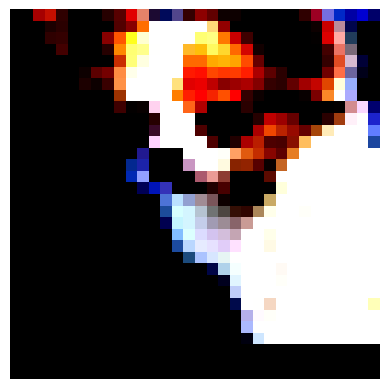

(None, 1)

In [ ]:
display_image(inputs,0)

In [ ]:
labels[]

In [ ]:
inputs.shape

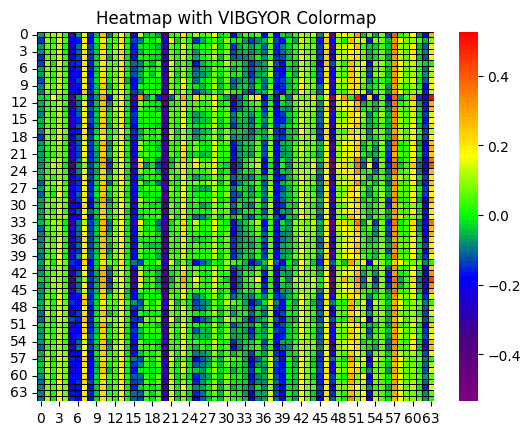

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the VIBGYOR colormap
colors = [
    (0.5, 0, 0.5),  # Violet
    (0.29, 0, 0.51),  # Indigo
    (0, 0, 1),  # Blue
    (0, 1, 0),  # Green
    (1, 1, 0),  # Yellow
    (1, 0.5, 0),  # Orange
    (1, 0, 0)   # Red
]
n_bins = 100  # Number of bins
cmap_name = 'vibgyor'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Example 65x65 array
data = npy_data[1][2][2]
# data = npy_data[1][2][2]

sns.heatmap(data, cmap=cm, linewidths=0.5, linecolor='black')
plt.title('Heatmap with VIBGYOR Colormap')
plt.show()


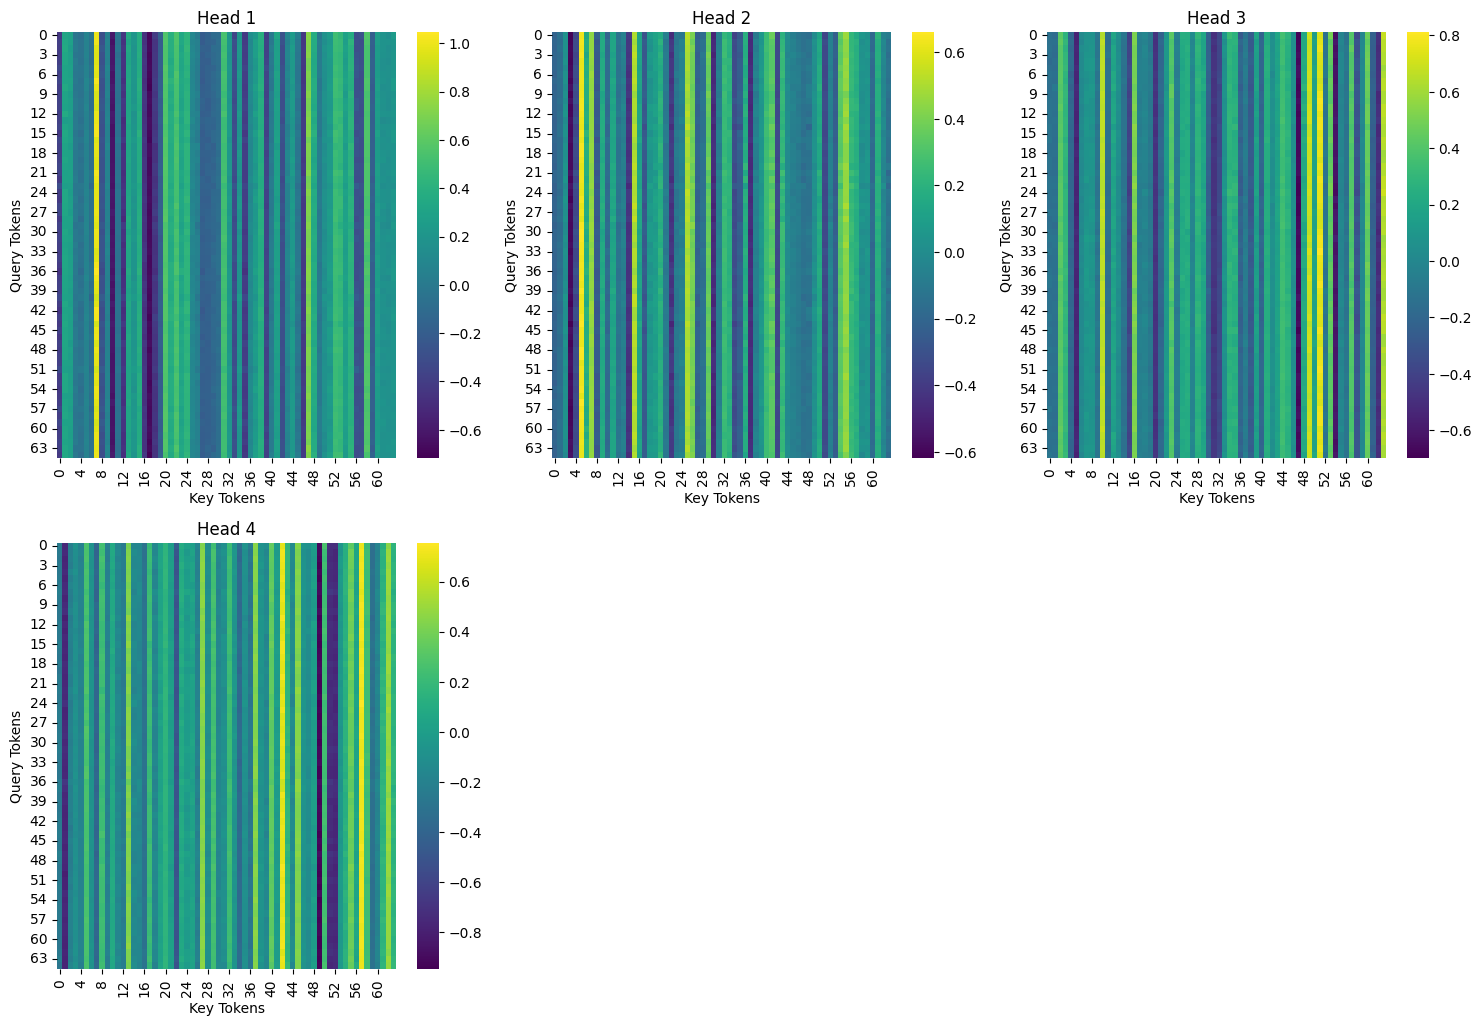

In [52]:
heat_map(npy_data[1],img_idx = 3)